# Capstone Project - The Battle of Neighborhoods (Week 1)

## 1. Introduction
#### New York is a major central city for economy and diversity since many people from different cultural atmospheres have brought their families and dreams to New York. 
#### People in New York have various cultural backgrounds so that it's easy to find a large variety of restaurants.
#### Sushi and Ramen are very popular and well-known Japanese dishes not only in Japan, but also outside of Japan as well. Especially, in Manhattan, New York, there are lots fo ramen and sushi restaurants because they do a good business.

## 2. Data

### What data is used and how will the problem be solved?

#### New York Neighbourhood Data is used in this analysis to get to know of New York neighbourhoods.
#### We also use the data we've got by webscraping, Foursquare API, and the visualised data by Folium.

#### We will be completely working on Foursquare data to explore and try to locate a spot for our new ramen/sushi restaurant, as stated before, at a location that is not already crowded with similar restaurants. We will examine each neighborhood in the area of interest, and using the Foursquare API, we will explore nearby venues. In particular, we are interested in the grabbing ramen or sushi to eat.

### Firstly, we need to import libraries.

In [1]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values
import geocoder
from IPython.display import Image 
from IPython.core.display import HTML 
from bs4 import BeautifulSoup # scraping library
from pandas.io.json import json_normalize
import json # JSON files manipulation
from sklearn.cluster import KMeans # clustering algorithm
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import folium # plotting library

### Importing New York Neighbourhood Data

In [2]:
with open('newyork_data.json') as json_data:
    newyork_data = json.load(json_data)

neighborhoods_data = newyork_data['features']

In [3]:
# define the dataframe columns
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

# instantiate the dataframe
neighborhoods = pd.DataFrame(columns=column_names)

In [4]:
for data in neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods = neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)
    
neighborhoods

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585
...,...,...,...,...
301,Manhattan,Hudson Yards,40.756658,-74.000111
302,Queens,Hammels,40.587338,-73.805530
303,Queens,Bayswater,40.611322,-73.765968
304,Queens,Queensbridge,40.756091,-73.945631


In [5]:
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(neighborhoods['Borough'].unique()),
        neighborhoods.shape[0]
    )
)

The dataframe has 5 boroughs and 306 neighborhoods.


### We need to get the latitude and longitude values by using Geopy

In [6]:
address = 'Manhattan, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

Man='Manhattan geograpical coordinate: {},{}'.format(latitude,longitude)

print(Man)

Manhattan geograpical coordinate: 40.7896239,-73.9598939


In [7]:
manhattan_data = neighborhoods[neighborhoods['Borough'] == 'Manhattan'].reset_index(drop=True)
manhattan_data.head()

,Borough,Neighborhood,Latitude,Longitude
0,Manhattan,Marble Hill,40.876551,-73.910660
1,Manhattan,Chinatown,40.715618,-73.994279
2,Manhattan,Washington Heights,40.851903,-73.936900
3,Manhattan,Inwood,40.867684,-73.921210
4,Manhattan,Hamilton Heights,40.823604,-73.949688


In [8]:
# create map of Manhattan using latitude and longitude values
map_manhattan = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(manhattan_data['Latitude'], manhattan_data['Longitude'], manhattan_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_manhattan)  
    
map_manhattan

In [9]:
CLIENT_ID = 'IVVSEMX5XRY2LU1R32RW0A5NJ35YNT4DL3CQV1GYBJU4M4NQ'
CLIENT_SECRET = 'BO00LD5AWTTUZ1MBXT5WFJNXQF3BPKCCV4AKUA0BSCPIGTFS' 
LIMIT = 100
VERSION = '20180605' 

### Now we search Ramen and Sushi restaurants in Manhattan.

In [10]:
search_query_ramen = 'Ramen'
search_query_sushi = 'Sushi'

radius = 2000
print(search_query_ramen + ' .... OK!')
print(search_query_sushi + ' .... OK!')

Ramen .... OK!
Sushi .... OK!


In [11]:
url_ramen = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query_ramen, radius, LIMIT)
url_sushi = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query_sushi, radius, LIMIT)

### Sending the GET Request and examine the results

In [12]:
results_ramen = requests.get(url_ramen).json()
results_sushi = requests.get(url_sushi).json()
print(results_ramen)
print(results_sushi)

{'meta': {'code': 200, 'requestId': '60b87a72a742af4e675cd0cb'}, 'response': {'venues': [{'id': '54a48e30498ef8abe3c6d4c5', 'name': 'Jin Ramen', 'location': {'address': '462 Amsterdam Ave', 'crossStreet': 'W 82nd St', 'lat': 40.78526069203778, 'lng': -73.97683897404411, 'labeledLatLngs': [{'label': 'display', 'lat': 40.78526069203778, 'lng': -73.97683897404411}, {'label': 'entrance', 'lat': 40.785332, 'lng': -73.976937}], 'distance': 1508, 'postalCode': '10024', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['462 Amsterdam Ave (W 82nd St)', 'New York, NY 10024', 'United States']}, 'categories': [{'id': '55a59bace4b013909087cb24', 'name': 'Ramen Restaurant', 'pluralName': 'Ramen Restaurants', 'shortName': 'Ramen', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/ramen_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-1622702706', 'hasPerk': False}, {'id': '5d92b1059289530008a23077', 'name': 'Kitakata Ramen Ban Nai',

### To edit the json data, we transfrom it into pandas dataframe.

In [13]:
# assign relevant part of JSON to venues
venues_ramen = results_ramen['response']['venues']
venues_sushi = results_sushi['response']['venues']

# tranform venues into a dataframe and merging both data
dataframe_ramen = pd.json_normalize(venues_ramen)
dataframe_sushi = pd.json_normalize(venues_sushi)

dataframe = pd.concat([dataframe_ramen,dataframe_sushi])

print("There are {} Ramen and Sushi Restaurants in Manhattan".format(dataframe.shape[0]))

There are 62 Ramen and Sushi Restaurants in Manhattan


### We define information and filter dataframe.

In [14]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

#dataframe_filtered
df=dataframe_filtered[['name','categories','lat','lng','distance']]
df.head(10)

,name,categories,lat,lng,distance
0,Jin Ramen,Ramen Restaurant,40.785261,-73.976839,1508
1,Kitakata Ramen Ban Nai,Ramen Restaurant,40.778841,-73.981183,2158
2,Zurutto Ramen & Gyoza Bar,Ramen Restaurant,40.778068,-73.980390,2153
3,Bua Thai Ramen & Robata Grill,Thai Restaurant,40.776350,-73.953080,1585
4,Naruto Ramen,Ramen Restaurant,40.781074,-73.952299,1146
5,Mr. Peng's Ramen & Sushi,Asian Restaurant,40.776838,-73.949757,1660
6,Naruto Ramen,Noodle House,40.797065,-73.970028,1189
7,Churutto Ramen,Japanese Restaurant,40.778990,-73.953954,1285
8,Mei-jin Ramen,Ramen Restaurant,40.775020,-73.953579,1710
9,Choudaiya Saji's Ramen,Japanese Restaurant,40.803239,-73.966922,1627


### Time to visualise Ramen/Sushi restaurants...

In [15]:
venues_map = folium.Map(location=[latitude, longitude], zoom_start=13) 

folium.CircleMarker(
    [latitude, longitude],
    radius=10,
    color='red',
    popup='Manhattan',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(venues_map)

# add the ramen/sushi restaurants as blue circle markers
for lat, lng, label in zip(df.lat, df.lng, df.name):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)
# display map
venues_map

In [16]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [17]:
manhattan_venues = getNearbyVenues(names=manhattan_data['Neighborhood'],
                                   latitudes=manhattan_data['Latitude'],
                                   longitudes=manhattan_data['Longitude']
                                  )

Marble Hill
Chinatown
Washington Heights
Inwood
Hamilton Heights
Manhattanville
Central Harlem
East Harlem
Upper East Side
Yorkville
Lenox Hill
Roosevelt Island
Upper West Side
Lincoln Square
Clinton
Midtown
Murray Hill
Chelsea
Greenwich Village
East Village
Lower East Side
Tribeca
Little Italy
Soho
West Village
Manhattan Valley
Morningside Heights
Gramercy
Battery Park City
Financial District
Carnegie Hill
Noho
Civic Center
Midtown South
Sutton Place
Turtle Bay
Tudor City
Stuyvesant Town
Flatiron
Hudson Yards


In [18]:
print(manhattan_venues.shape)
manhattan_venues.head()

(3229, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Marble Hill,40.876551,-73.91066,Bikram Yoga,40.876844,-73.906204,Yoga Studio
1,Marble Hill,40.876551,-73.91066,Arturo's,40.874412,-73.910271,Pizza Place
2,Marble Hill,40.876551,-73.91066,Tibbett Diner,40.880404,-73.908937,Diner
3,Marble Hill,40.876551,-73.91066,Dunkin',40.877136,-73.906666,Donut Shop
4,Marble Hill,40.876551,-73.91066,Starbucks,40.877531,-73.905582,Coffee Shop


In [19]:
manhattan_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Battery Park City,80,80,80,80,80,80
Carnegie Hill,91,91,91,91,91,91
Central Harlem,42,42,42,42,42,42
Chelsea,100,100,100,100,100,100
Chinatown,100,100,100,100,100,100
Civic Center,100,100,100,100,100,100
Clinton,100,100,100,100,100,100
East Harlem,39,39,39,39,39,39
East Village,100,100,100,100,100,100


### We analyse each neighbourhood now.

In [20]:
# one hot encoding
manhattan_onehot = pd.get_dummies(manhattan_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
manhattan_onehot['Neighborhood'] = manhattan_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [manhattan_onehot.columns[-1]] + list(manhattan_onehot.columns[:-1])
manhattan_onehot = manhattan_onehot[fixed_columns]

manhattan_onehot.head()

,Neighborhood,Accessories Store,Adult Boutique,African Restaurant,American Restaurant,Antique Shop,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,...,Video Store,Vietnamese Restaurant,Volleyball Court,Waterfront,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,Marble Hill,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,Marble Hill,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Marble Hill,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Marble Hill,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Marble Hill,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Methodology 

In this project we will direct our efforts on detecting areas of Manhattan that have low restaurant density, particularly those with low number of Ramen and Sushi restaurants. We will limit our analysis to area ~5km around city center.

Firstly, we have collected the required data about the location of each neighborhood and the type(category) of the venues within 5 km from the center of Manhattan. We also identified all the Ramen and Sushi restaurants in the area (according to Foursquare categorization).

Second step in our analysis will be calculation and exploration of 'restaurant frequency' across different areas of Manhattan.

Lastly,  we use K-Means Clustering to create clusters of locations that meet our criteria as previous discussed in the inital introduction of the data. We then created a map of those clusters to better visualize the data and explore the best location for the investors.

## Analysis

In [21]:
manhattan_grouped = manhattan_onehot.groupby('Neighborhood').mean().reset_index()
manhattan_grouped.head()

,Neighborhood,Accessories Store,Adult Boutique,African Restaurant,American Restaurant,Antique Shop,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,...,Video Store,Vietnamese Restaurant,Volleyball Court,Waterfront,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,Battery Park City,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.00000,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.012500,0.0,0.000000,0.000000
1,Carnegie Hill,0.0,0.0,0.000000,0.010989,0.0,0.010989,0.00000,0.021978,0.0,...,0.0,0.021978,0.0,0.0,0.0,0.010989,0.043956,0.0,0.010989,0.032967
2,Central Harlem,0.0,0.0,0.047619,0.047619,0.0,0.000000,0.02381,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000
3,Chelsea,0.0,0.0,0.000000,0.040000,0.0,0.000000,0.06000,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.030000,0.0,0.010000,0.000000
4,Chinatown,0.0,0.0,0.000000,0.040000,0.0,0.000000,0.00000,0.000000,0.0,...,0.0,0.020000,0.0,0.0,0.0,0.010000,0.000000,0.0,0.000000,0.000000


In [22]:
df_ramensushi=manhattan_grouped[['Neighborhood','Sushi Restaurant','Ramen Restaurant']]
df_ramensushi.head()

,Neighborhood,Sushi Restaurant,Ramen Restaurant
0,Battery Park City,0.000000,0.000000
1,Carnegie Hill,0.010989,0.010989
2,Central Harlem,0.000000,0.000000
3,Chelsea,0.020000,0.000000
4,Chinatown,0.000000,0.010000


In [23]:
manhattan_clustering=df_ramensushi.drop(['Neighborhood'],axis=1)
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(manhattan_clustering)
    distortions.append(kmeanModel.inertia_)

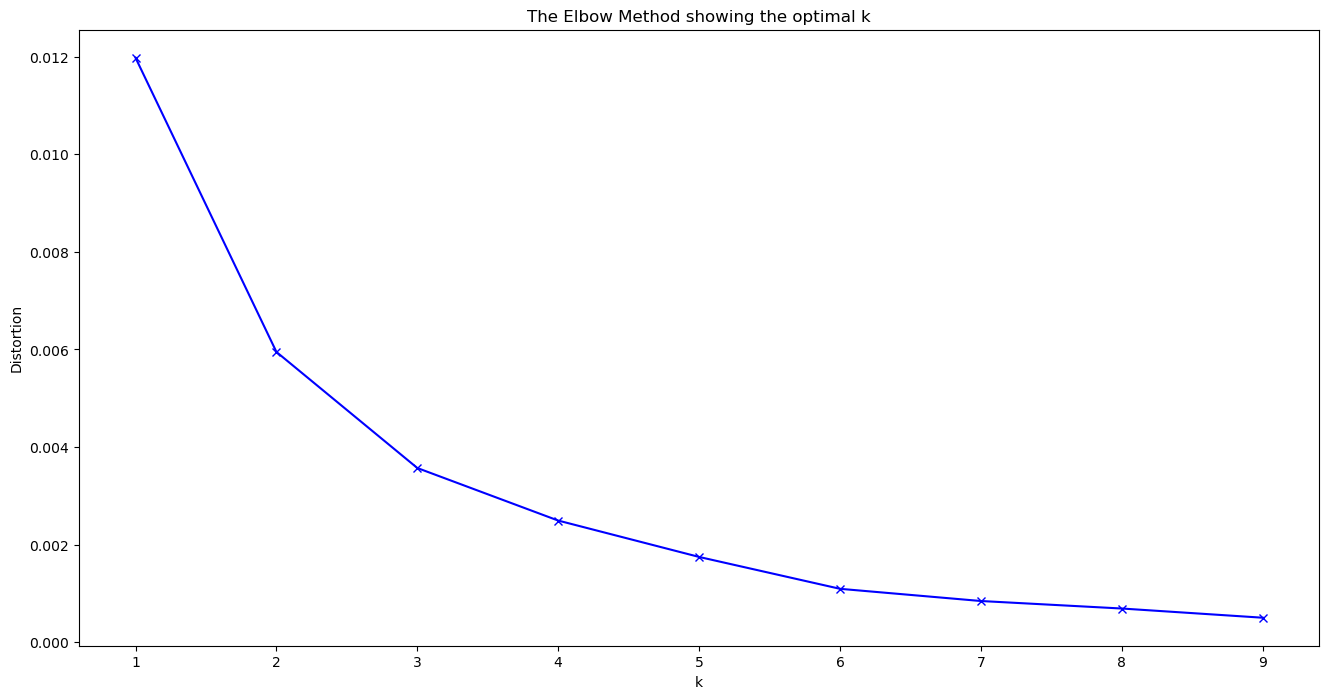

In [24]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

### Based on the elbow method, the best value for K is K=2. Now we will perform K means clustering to segment the neighborhood into 2 clusters.

In [25]:

# set number of clusters
kclusters = 2

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(manhattan_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([0, 0, 0, 1, 0, 1, 0, 0, 0, 0])

### Let's create a new dataframe that includes the assigned cluster number as well as the borough name, neighborhood name as well as latitude and longitude, and the frequency of ramen and sushi restaurants. We will do this by merging two of our existing dataframes, df_ramensushi and df.

In [26]:
df.rename(columns={'Neighborhood':'Neighborhood'},inplace=True)
# add clustering labels
df_ramensushi.insert(0, 'cluster number', kmeans.labels_)

df_labeledclusters=pd.merge(df_ramensushi,manhattan_data, how='left',left_on='Neighborhood',right_on='Neighborhood')

df_labeledclusters.head()

C:\Users\master\anaconda3\lib\site-packages\pandas\core\frame.py:4125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,cluster number,Neighborhood,Sushi Restaurant,Ramen Restaurant,Borough,Latitude,Longitude
0,0,Battery Park City,0.000000,0.000000,Manhattan,40.711932,-74.016869
1,0,Carnegie Hill,0.010989,0.010989,Manhattan,40.782683,-73.953256
2,0,Central Harlem,0.000000,0.000000,Manhattan,40.815976,-73.943211
3,1,Chelsea,0.020000,0.000000,Manhattan,40.744035,-74.003116
4,0,Chinatown,0.000000,0.010000,Manhattan,40.715618,-73.994279


### We visualise the clustering by using Folium.

In [28]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(df_labeledclusters['Latitude'],df_labeledclusters['Longitude'], df_labeledclusters['Neighborhood'], df_labeledclusters['cluster number']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

#### Cluster 1

In [29]:
df_labeledclusters.loc[df_labeledclusters['cluster number']==0]

,cluster number,Neighborhood,Sushi Restaurant,Ramen Restaurant,Borough,Latitude,Longitude
0,0,Battery Park City,0.000000,0.000000,Manhattan,40.711932,-74.016869
1,0,Carnegie Hill,0.010989,0.010989,Manhattan,40.782683,-73.953256
2,0,Central Harlem,0.000000,0.000000,Manhattan,40.815976,-73.943211
4,0,Chinatown,0.000000,0.010000,Manhattan,40.715618,-73.994279
6,0,Clinton,0.000000,0.000000,Manhattan,40.759101,-73.996119
7,0,East Harlem,0.000000,0.000000,Manhattan,40.792249,-73.944182
8,0,East Village,0.010000,0.020000,Manhattan,40.727847,-73.982226
9,0,Financial District,0.000000,0.000000,Manhattan,40.707107,-74.010665
10,0,Flatiron,0.010000,0.000000,Manhattan,40.739673,-73.990947
11,0,Gramercy,0.010309,0.000000,Manhattan,40.737210,-73.981376


#### Cluster 2

In [30]:
df_labeledclusters.loc[df_labeledclusters['cluster number']==1]

,cluster number,Neighborhood,Sushi Restaurant,Ramen Restaurant,Borough,Latitude,Longitude
3,1,Chelsea,0.020000,0.000000,Manhattan,40.744035,-74.003116
5,1,Civic Center,0.020000,0.000000,Manhattan,40.715229,-74.005415
12,1,Greenwich Village,0.050000,0.010000,Manhattan,40.726933,-73.999914
13,1,Hamilton Heights,0.032787,0.000000,Manhattan,40.823604,-73.949688
16,1,Lenox Hill,0.040000,0.000000,Manhattan,40.768113,-73.958860
21,1,Manhattanville,0.022222,0.022222,Manhattan,40.816934,-73.957385
26,1,Murray Hill,0.030000,0.010000,Manhattan,40.748303,-73.978332
27,1,Noho,0.030000,0.000000,Manhattan,40.723259,-73.988434
33,1,Tudor City,0.038462,0.000000,Manhattan,40.746917,-73.971219
34,1,Turtle Bay,0.040000,0.030000,Manhattan,40.752042,-73.967708


## Results and Discussion

Based on the our cluseter analysis, we find that even though there are many ramen and sushi restaurants there are definitely a couple of neighborhoods that do not have any of these restaurants in the vicinity. The main were on the two specific restaurants near each neighborhood- ramen and sushi. We used specifically kmeans for this project.

To recap, we predominantly focused on the Manhattan area of New York within a 2km radius. With this we were able to narrow it down the neighborhoods to the many locations that are marked under cluster 1. This group is predominantly the neighborhoods that does not have either ramen or sushi restaraunts. While cluster 2 has a higher frequency of both types of restaurants. More specifically we would probably determine the south side of Manhattan to be the optimal area for opening a ramen/sushi restaurant.

Also the down side of this analysis would be the reliance on the Foursquare API. It has a lot of informaiton saved but it doesn't help give more insight on other factors an investor should consider. It helps with locaiton but not exactly with for instance property overhead, proximity to major roads and highways, or socio/economic status of each neighborhood.

## Conclusion

Purpose of this project was to identify the Manhattan area close to center with low number of restaurants (particularly Ramen and Sushi restaurants) in order to aid stakeholders in narrowing down the search for optimal location for opening the restaurant. Calculating the frequency of the ramen/sushi restaurants with the help of data from Foursquare, helped us determine what neighborhoods meet our criteria. Clustering helped us determine what zones are of interest to help create a starting point on where the ideal location would be.

With that being said, the final decision is ultimately up to the stakeholders on where to open up the new restaurant based on the analysis we provided. Location is very important but I still do believe other factors are just as important.